<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/decision_tree/classify_bitcoin_and_litecoin_network_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree

# **Funciones**
---

In [2]:
sns.set(style="darkgrid")


from matplotlib.colors import ListedColormap

def generate_colors(paleta="Set1", n_colors=15):
  """Generador de colores"""
  cmap = sns.color_palette(paleta, n_colors).as_hex()
  list_camap = ListedColormap(cmap)
  return cmap, list_camap

def plot_bar(data, paleta = None, figsize_x=8,figsize_y=5,fontsize=15, **kwards)->None:
  """Grafica un diagrama de barras con multiples caracteristicas"""
  paleta = paleta if paleta !=None else generate_colors()[0]
  v = kwards
  ejeX = v['ejeX']


  fig, ax = plt.subplots(figsize = (figsize_x, figsize_y))
  fig.suptitle(f'Diagrama de barras {v["title"]}', fontsize=fontsize)

  if type(v['ejeX']) == str:
    sns.countplot(x=ejeX, data=data, ax = ax, palette=paleta)
  else:
    ejeX = v['ejeX'][0]
    sns.countplot(x=ejeX,hue=v['ejeX'][1], data=data, ax = ax, palette=paleta)
    

  ax.set_ylabel(v['ejey'], size = 12)
  ax.set_xlabel(ejeX, size=fontsize-3)
  ax.set_xticklabels(ax.get_xticklabels(),fontsize = fontsize-3)
  for p in ax.patches:
    try:
      height = int(p.get_height())
      ax.text(p.get_x()+p.get_width()/2., height + 1,height, ha="center") 
    except:
      pass
paleta = {
    'Yangon': 'blue',
    'Mandalay': 'red',
    'Naypyitaw': 'orange'
}

# **Diccionario de datos**
---
- `Name`: nombre de la ventana de tiempo.
- `Netflows`: cantidad de netflows en la ventana de tiempo.
- `First_Protocol`: top 1 de protocolos usados en la ventana de tiempo.
- `Second_Protocol`: top 2 de protocolos usados en la ventana de tiempo.
- `Third_Protocol`: top 3 de protocolos usados en la ventana de tiempo.
- `p1_d`: 25% de los percentiles de todas las duraciones en la ventana de tiempo
- `p2_d`: 50% de los percentiles de todas las duraciones en la ventana de tiempo
- `p3_d`: 75% de los percentiles de todas las duraciones en la ventana de tiempo
- `duration`: duración total de la ventana de tiempo
- `max_d`: valor máximo de todas las duraciones en la ventana de tiempo.
- `min_d`: valor mínimo de todas las duraciones en la ventana de tiempo.
- `#packets`: número total de paquetes en la ventana de tiempo.
- `Avg_bps`: promedio de bits por segundo en la ventana de tiempo.
- `Avg_pps`: promedio de paquetes por segundo en la ventana de tiempo.
- `Avg_bpp`: promedio de bytes por paquete en la ventana de tiempo.
- `#Bytes`: número total de bytes en la ventana de tiempo.
- `#sp`: número total de puertos de origen usados en la ventana de tiempo.
- `#dp`: número total de puertos de destino usados en la ventana de tiempo.
- `first_sp`: top 1 de los puertos de origen en la ventana de tiempo.
- `second_sp`: top 2 de los puertos de origen en la ventana de tiempo.
- `third_sp`: top 3 de los puertos de origen en la ventana de tiempo.
- `first_dp`: top 1 de los puertos de destino en la ventana de tiempo.
- `second_dp`: top 2 de los puertos de destino en la ventana de tiempo.
- `third_dp`: top 3 de los puertos de destino en la ventana de tiempo.
- `p1_ip`: 25% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p2_ip`: 50% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p3_ip`: 75% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p1_ib`: 25% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `p2_ib`: 50% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `p3_ib`: 75% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `Type`: tipo de ventana de tiempo
  - `benignas`: 0
  - `bitcash`: 1
  - `bitcoin`: 2
  - `ethereum `: 3
  - `monero`: 4
  - `litecoin`: 5


# **Data**
---

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Kaiziferr/datasets/main/cryptojacking.csv')

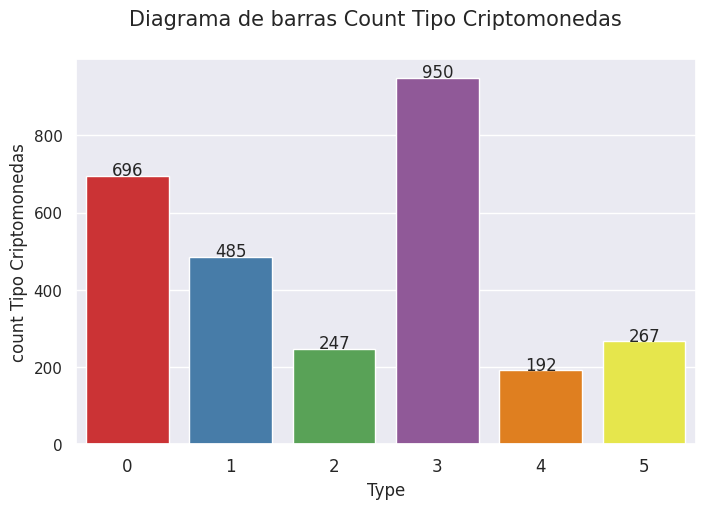

In [4]:
plot_bar(data, paleta=None, ejeX='Type',ejey='count Tipo Criptomonedas',title='Count Tipo Criptomonedas')

# **Para el ejercicio, realizaremos una clasificación de trafico entre bitcoins y litecoin**

In [5]:
data_sample = data[(data.Type == 2) | (data.Type == 5)].drop('Unnamed: 0', axis=1)

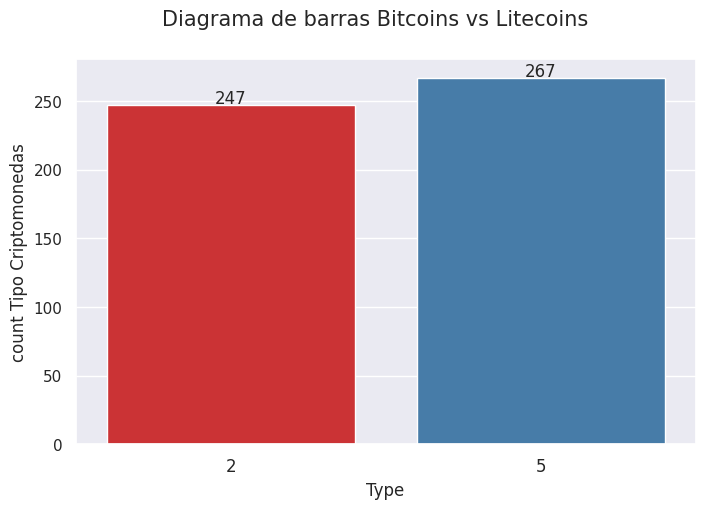

In [6]:
plot_bar(data_sample, paleta=None, ejeX='Type',ejey='count Tipo Criptomonedas',title='Bitcoins vs Litecoins')

- El conjunto sufre un desbalance minimo

In [7]:
data_sample.isna().sum()

Name                 0
Netflows             0
First_Protocol       0
Second_Protocol    514
Third_Protocol     514
p1_d                 0
p2_d                 0
p3_d                 0
duration             0
max_d                0
min_d                0
#packets             0
Avg_bps              0
Avg_pps              0
Avg_bpp              0
#Bytes               0
#sp                  0
#dp                  0
first_sp             0
second_sp            4
third_sp           409
first_dp             0
second_dp            4
third_dp           410
p1_ip                0
p2_ip                0
p3_ip                0
p1_ib                0
p2_ib                0
p3_ib                0
Type                 0
dtype: int64

Por cuestiones del ejercicio se eliminaran las columnas de valores nulos

In [8]:
data_sample = data_sample.drop(['third_sp', 'third_dp'], axis=1)

# Data Split
---

Si bien se puede usar las variables categoricas, por fines del ejercicio se usaran las variables cuantitativas.

In [9]:
X = data_sample.select_dtypes(['int64', 'float64'])

In [10]:
X = X.dropna()
X.isna().sum()

Netflows     0
p1_d         0
p2_d         0
p3_d         0
duration     0
max_d        0
min_d        0
#packets     0
Avg_bps      0
Avg_pps      0
Avg_bpp      0
#Bytes       0
#sp          0
#dp          0
first_sp     0
second_sp    0
first_dp     0
second_dp    0
p1_ip        0
p2_ip        0
p3_ip        0
p1_ib        0
p2_ib        0
p3_ib        0
Type         0
dtype: int64

In [11]:
y = X['Type']
X = X.iloc[:, :-1]


**Select the best features**


Se cambiara solo el criterio de impureza, en proximos ejercicios se implementaran otros hiperparametros. Se usa un ensamblador para encontrar las mejores caracteristicas.

In [12]:
model_best_feature_gini =  ExtraTreesClassifier(n_estimators=100, criterion='gini')

In [13]:
data_best_gini = model_best_feature_gini.fit(X, y)

Seleccionamos las mejores caracteristicas, para implementar un metodo para la reducción de overfitting.

In [14]:
model = SelectFromModel(data_best_gini, prefit=True)
best_features = X[X.columns[model.get_support(indices = True)]].columns
best_features

Index(['p1_d', 'p2_d', 'p3_d', 'max_d', 'min_d', '#sp', 'first_sp',
       'second_sp', 'first_dp', 'p1_ib'],
      dtype='object')

No se implementará un proceso de estandarización, ya que el modelo es robusto ante ese tipo de casos.

In [15]:
X =  X[best_features]
X

,p1_d,p2_d,p3_d,max_d,min_d,#sp,first_sp,second_sp,first_dp,p1_ib
1181,114.79300,180.0435,245.27525,245.276,114.736,3,3332,51931.0,3332,433.00
1182,196.18225,196.1895,196.19675,196.204,196.175,2,3332,51905.0,3332,2679.50
1183,244.14325,244.1435,244.14375,244.144,244.143,2,3332,51911.0,3332,3642.75
1184,244.04600,244.0460,244.04600,244.046,244.046,2,3332,51908.0,3332,3592.50
1185,246.79500,246.7950,246.79500,246.795,246.795,2,51915,3332.0,51915,3728.75
...,...,...,...,...,...,...,...,...,...,...
2832,2.15850,4.3170,6.47550,8.634,0.000,2,3333,52003.0,3333,328.25
2833,583.36850,583.8100,584.25150,584.693,582.927,2,3333,52003.0,3333,10108.75
2834,288.55375,288.5545,288.55525,288.556,288.553,2,3333,52003.0,3333,3865.00
2835,285.37900,285.3790,285.37900,285.379,285.379,2,3333,52003.0,3333,4627.50


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=12354, shuffle=True, stratify=y)

In [17]:
final_comp = 0
for comp in range(3, X_train.shape[1]):
  pca = PCA(n_components=comp, random_state=42)
  pca.fit(X_train)
  comp_check = pca.explained_variance_ratio_
  final_comp = comp
  if comp_check.sum() > 0.85:
    break

  

final_pca = PCA(n_components=final_comp, random_state=42)
final_pca.fit(X_train)
data_x_train =final_pca.transform(X_train)
data_x_test = final_pca.transform(X_test)
num_comps = comp_check.shape[0]

print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 3 components, we can explain 0.9958503090262131% of the variability in the original data.


In [18]:
model = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth=3, min_samples_leaf=5, random_state=12354)
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

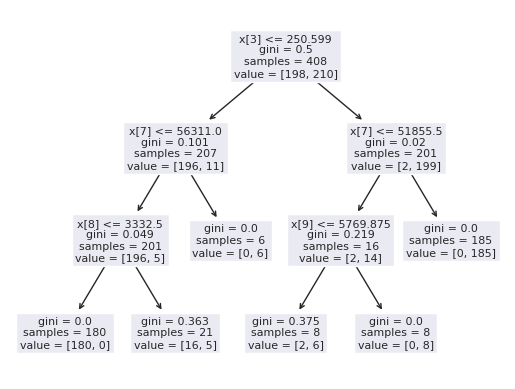

In [19]:
tree.plot_tree(model)
plt.show()

In [20]:
y_predict_test

array([2, 5, 2, 5, 5, 5, 2, 2, 5, 2, 2, 5, 5, 5, 2, 5, 2, 5, 5, 5, 5, 2,
       2, 2, 5, 5, 5, 5, 5, 2, 5, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 5, 5,
       5, 5, 2, 2, 5, 2, 5, 2, 5, 5, 2, 5, 2, 2, 5, 5, 2, 5, 5, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 5, 2, 2, 5, 5, 5, 2, 2, 5, 5, 5,
       2, 2, 5, 5, 5, 5, 2, 2, 5, 2, 5, 2, 5, 2])

In [21]:
def matrix_confusion(y_true, y_pred, labels=None, title='confusion matrix'):

  try:
    churm = metrics.confusion_matrix(y_true, y_pred, labels=labels)
    fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (8,6))
    sns.heatmap(churm, annot=True, cmap = plt.cm.copper_r, ax = ax,fmt='g',annot_kws={"size": 12});
    ax.set_title(title,size=20)
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ax.tick_params(labelsize = 12)
  except:
    pass



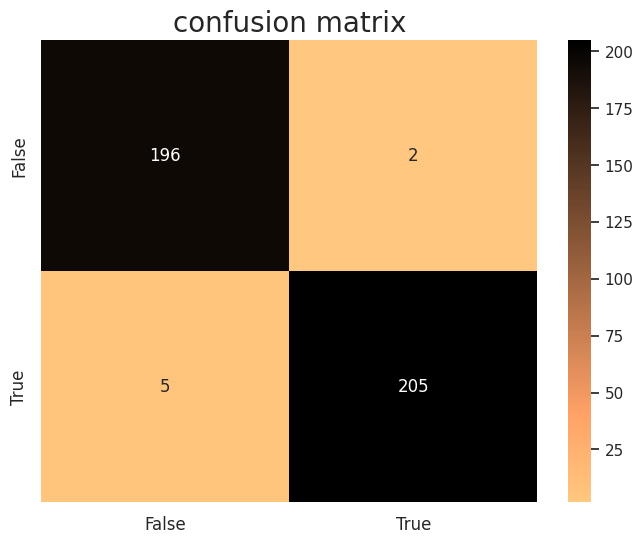

In [22]:
matrix_confusion(y_train, y_predict_train, title='confusion matrix')

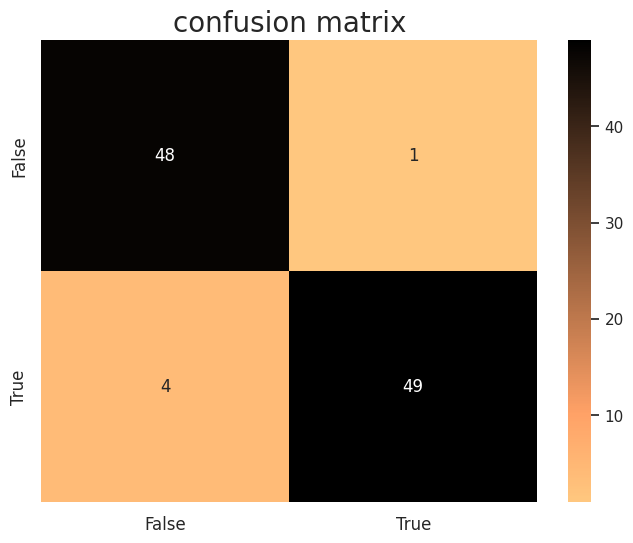

In [23]:
matrix_confusion(y_test, y_predict_test, title='confusion matrix')

- A partir de la matriz de confusión, se evidencia que el modelo se equivocó 5 veces en la distinción en registros de bitcoín y litecoin.

Se utiliza la exactitud, ya que la distinción de uno o el otro no tiene un impacto crítico, como para usar la sensibilidad o el f1-score, Además el propósito no es determinar una clase en particular, como para usar la precisión

In [24]:
 accuracy_me = metrics.accuracy_score(y_test, y_predict_test)
 accuracy_me

0.9509803921568627

In [25]:
 accuracy_me = metrics.accuracy_score(y_train, y_predict_train)
 accuracy_me

0.9828431372549019

- El modelo tiene un buen rendimiento para distinguir trafico de red entre bitcoin y litecoin, aunque parece haber un pequeño sobreajuste

# **Pospoda**
---
**Cost Complexity Pruning**
La poda de complejidad de costos se trata de encontrar el parámetro correcto para alfa.

In [27]:
model = DecisionTreeClassifier(random_state = 12354)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12354)

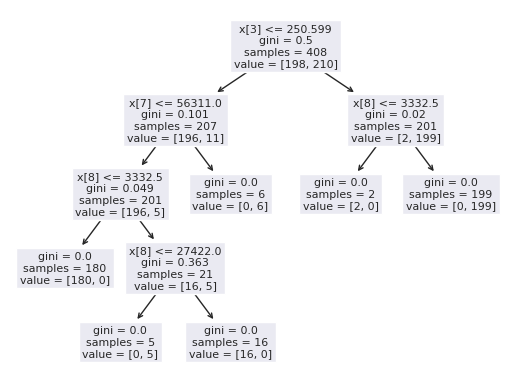

In [28]:
tree.plot_tree(model)
plt.show()

In [29]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

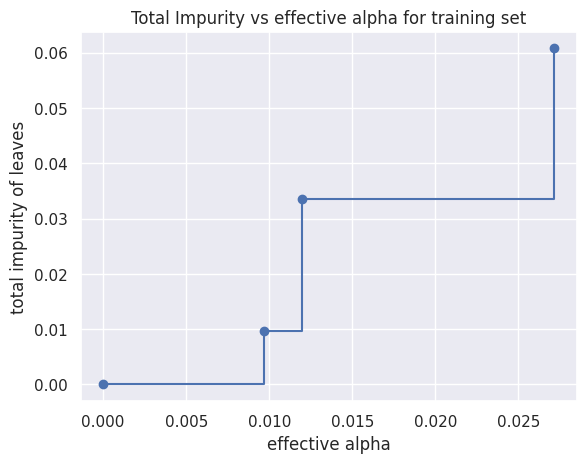

In [30]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [31]:
impurities 

array([0.        , 0.00970637, 0.03360648, 0.06076254, 0.49956747])

In [32]:
ccp_alphas

array([0.        , 0.00970637, 0.01195005, 0.02715606, 0.43880493])

In [34]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=12354, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.4388049326774349


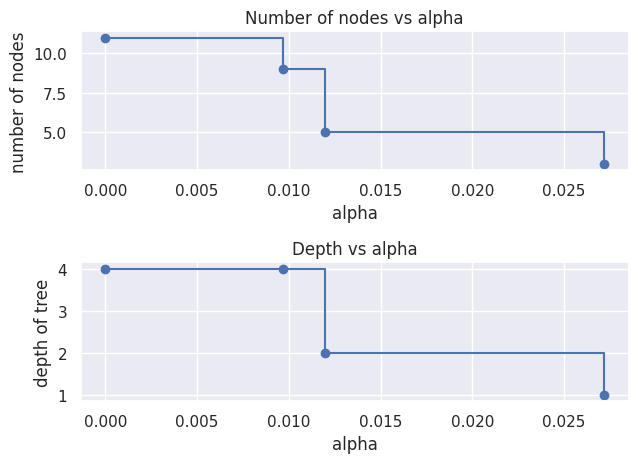

In [35]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

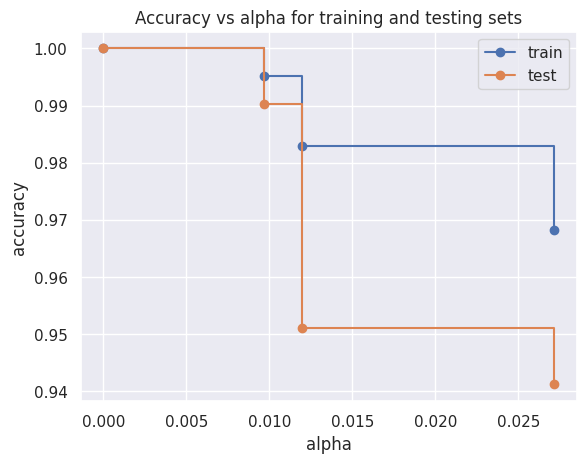

In [36]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

- Seleccionamos el alpha 0.010 que permite la maxima exactitud de prueba del 99 junto a una exactitud del 99%.

In [37]:
ccp_alphas

array([0.        , 0.00970637, 0.01195005, 0.02715606])

In [41]:
model = DecisionTreeClassifier(random_state=12354, ccp_alpha=0.010)
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [42]:
metrics.accuracy_score(y_train, y_predict_train)

0.9950980392156863

In [43]:
metrics.accuracy_score(y_test, y_predict_test)

0.9901960784313726

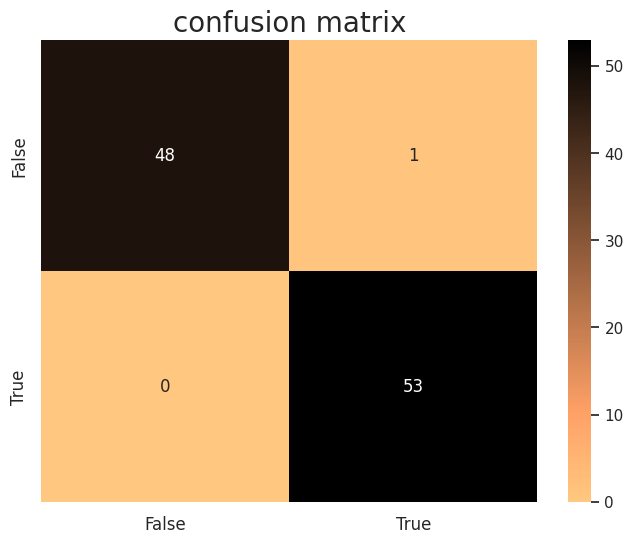

In [44]:
matrix_confusion(y_test, y_predict_test, title='confusion matrix')

- Se debe recordar que el modelo se entrenó con un conjunto de datos pequeño, con técnicas de reducción de dimensionalidad, entre otros factores, permitieron que el modelo aprendiera de manera eficiente, y los efectos de la pos poda costo mínimo de complejidad, no se aprecie de manera significativa.